<a href="https://colab.research.google.com/github/94spinoza/Code-Blocks/blob/main/Company_Bankruptcy_Prediction(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle 데이터 불러오기

In [2]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

# 파일 다운로드
!kaggle datasets download -d fedesoriano/company-bankruptcy-prediction

company-bankruptcy-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip company-bankruptcy-prediction.zip

Archive:  company-bankruptcy-prediction.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


## 기준모델

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df_origin = pd.read_csv("data.csv")
df, df_test = train_test_split(df_origin, test_size=0.2)

target = ['Bankrupt?']


## 기준 모델
base_accuracy = df_test[target].value_counts(normalize=True)[0]
print("기준모델 정확도: ", base_accuracy)

기준모델 정확도:  Bankrupt?
0            0.967742
dtype: float64


## Oversampling 통해 데이터 편향 해결

In [6]:
from imblearn.over_sampling import SMOTE


## Oversampling 통해 데이터 편향 해결
oversample = SMOTE(random_state=2)

X_a = df.drop(labels=target, axis=1)
y_a = df[target]

X, y = oversample.fit_resample(X_a, y_a)
X = pd.DataFrame(X, columns=X_a.columns)
y = pd.DataFrame(y, columns=['Bankruptcy?'])

print("Oversampling 이후 기준모델 정확도: ", y.value_counts(normalize=True)[0])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Oversampling 이후 기준모델 정확도:  Bankruptcy?
0              0.5
dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Train & Validation Data Split

In [7]:
## Train & Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## <Model 2>
## Logistic Regression 학습시키기

In [8]:
pip install category_encoders

In [9]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


## Logistic Regression
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=2)
)

pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGE

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=2,


## Logistic Regression 예측하기

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4235
           1       0.90      0.92      0.91      4211

    accuracy                           0.91      8446
   macro avg       0.91      0.91      0.91      8446
weighted avg       0.91      0.91      0.91      8446

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1044
           1       0.90      0.94      0.92      1068

    accuracy                           0.92      2112
   macro avg       0.92      0.92      0.92      2112
weighted avg       0.92      0.92      0.92      2112

AUC: 0.9168442464161178


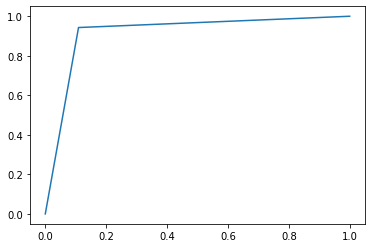

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import numpy as np


## 데이터 예측하기
y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

## Confusion Matrix 출력
print(classification_report(y_train,y_train_pred))
print(classification_report(y_val,y_val_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## Permutation Importance 알아보기

In [11]:
pip install eli5

In [12]:
from sklearn.pipeline import Pipeline
import warnings
import eli5
from eli5.sklearn import PermutationImportance

## Permutation Importance 활용
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe_per = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(), StandardScaler())),
    ('lr', LogisticRegression(random_state=2)) 
])

pipe_per.fit(X_train, y_train)


## Permutation Part
warnings.simplefilter(action='ignore', category=FutureWarning)

# permuter 정의
permuter = PermutationImportance(
    pipe_per.named_steps['lr'], # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe_per.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

PermutationImportance(cv='prefit',
                      estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=2,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_iter=5, random_state=2, refit=True, scoring='roc_auc')

In [13]:
feature_names = X_val.columns.tolist()
print("총 변수의 개수 : ", len(feature_names))
pd.Series(permuter.feature_importances_, feature_names).sort_values()

총 변수의 개수 :  95


 Realized Sales Gross Profit Growth Rate   -0.001376
 Inventory/Current Liability               -0.000513
 Current Assets/Total Assets               -0.000174
 Continuous Net Profit Growth Rate         -0.000109
 Current Asset Turnover Rate               -0.000104
                                              ...   
 Net worth/Assets                           0.026838
 Debt ratio %                               0.027962
 Borrowing dependency                       0.064694
 Net Value Per Share (B)                    0.077314
 Persistent EPS in the Last Four Seasons    0.168255
Length: 95, dtype: float64

In [86]:
 ## 중요하지 않은 변수 삭제
minimum_importance = 0.01
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]

X_train_selected = X_train[features]
X_val_selected = X_val[features]


## 삭제 후 새로운 Pipeline
pipe_sel = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(), StandardScaler())),
    ('lr', LogisticRegression(random_state=2)) 
], verbose=1)

pipe_sel.fit(X_train_selected, y_train)

print("총 변수의 개수 : ", len(X_val_selected.columns.tolist()))
print('시험 정확도 : ', pipe_sel.score(X_val_selected, y_val))

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.1s
총 변수의 개수 :  12
시험 정확도 :  0.8977272727272727


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Permutation Importance 분석으로 불필요한 변수 삭제 후 성능

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1044
           1       0.89      0.91      0.90      1068

    accuracy                           0.90      2112
   macro avg       0.90      0.90      0.90      2112
weighted avg       0.90      0.90      0.90      2112

AUC: 0.8975526281802919


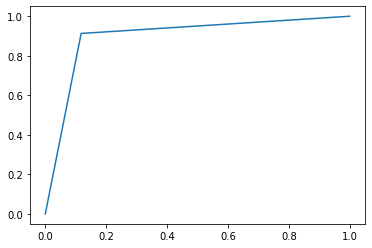

In [15]:
## Confusion Matrix 출력
y_val_selected_pred = pipe_sel.predict(X_val_selected)
print(classification_report(y_val, y_val_selected_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_val, y_val_selected_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 상관관계 및 다중공선성 진단

In [71]:
print(X_val_selected.corr())

                                           Net Value Per Share (B)  ...   Equity to Liability
 Net Value Per Share (B)                                  1.000000  ...              0.171263
 Net Value Per Share (C)                                  0.999160  ...              0.171242
 Persistent EPS in the Last Four Seasons                  0.786578  ...              0.150604
 Total debt/Total net worth                               0.031201  ...              0.712684
 Debt ratio %                                            -0.517916  ...             -0.544322
 Net worth/Assets                                         0.517916  ...              0.544322
 Borrowing dependency                                    -0.176857  ...             -0.101847
 Operating profit/Paid-in capital                         0.684204  ...              0.068863
 Cash/Total Assets                                        0.314376  ...              0.242294
 Liability-Assets Flag                                   -0.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_val_selected.values, i) for i in range(X_val_selected.shape[1])]
vif["features"] = X_val_selected.columns
vif.round(1)

,VIF Factor,features
0,614.3,Net Value Per Share (B)
1,612.0,Net Value Per Share (C)
2,7.8,Persistent EPS in the Last Four Seasons
3,2.8,Total debt/Total net worth
4,25.0,Debt ratio %
5,339.3,Net worth/Assets
6,1.4,Borrowing dependency
7,4.7,Operating profit/Paid-in capital
8,1.4,Cash/Total Assets
9,1.9,Liability-Assets Flag


In [111]:
clean_features = features.tolist()
clean_features.remove(" Net Value Per Share (B)")
clean_features.remove(" Net worth/Assets")
clean_features.remove(" Persistent EPS in the Last Four Seasons")
clean_features.remove(" Net Income to Total Assets")
clean_features.remove(" Borrowing dependency")
clean_features.remove(" Net Value Per Share (C)")
clean_features.remove(" Total debt/Total net worth")
# clean_features

In [112]:
X_val_vif = X_val[clean_features]

vif_after = pd.DataFrame()
vif_after["VIF Factor"] = [variance_inflation_factor(X_val_vif.values, i) for i in range(X_val_vif.shape[1])]
vif_after["features"] = X_val_vif.columns
vif_after.round(1)

,VIF Factor,features
0,4.9,Debt ratio %
1,7.1,Operating profit/Paid-in capital
2,2.0,Cash/Total Assets
3,1.2,Liability-Assets Flag
4,1.7,Equity to Liability


## 다중공선성 높은 변수 제거 후 성능

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1044
           1       0.86      0.91      0.88      1068

    accuracy                           0.88      2112
   macro avg       0.88      0.88      0.88      2112
weighted avg       0.88      0.88      0.88      2112

AUC: 0.8784816393301477


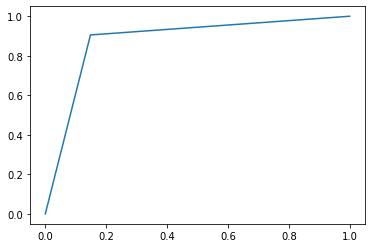

In [113]:
X_train_vif = X_train[clean_features]

pipe_vif = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer(), StandardScaler())),
    ('lr', LogisticRegression(random_state=2)) 
], verbose=1)

pipe_vif.fit(X_train_vif, y_train)

## Confusion Matrix 출력
y_val_vif_pred = pipe_vif.predict(X_val_vif)
print(classification_report(y_val, y_val_vif_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_val, y_val_vif_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## Oversampling하여 학습한 모델을 비대칭적인 데이터셋에 적용

## pipe_sel (VIF 이전)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1320
           1       0.20      0.89      0.32        44

    accuracy                           0.88      1364
   macro avg       0.60      0.88      0.63      1364
weighted avg       0.97      0.88      0.91      1364

AUC: 0.8829545454545454


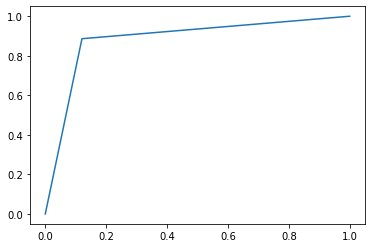

In [114]:
X_test = df_test.drop(labels=target, axis=1)
X_test_selected = X_test[features]
X_test_vif = X_test[clean_features]
y_test = df_test[target]


## Confusion Matrix 출력
y_test_selected_pred = pipe_sel.predict(X_test_selected)
print(classification_report(y_test, y_test_selected_pred))


## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_test_selected_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## pipe_vif (VIF 이후)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1320
           1       0.16      0.80      0.27        44

    accuracy                           0.86      1364
   macro avg       0.58      0.83      0.60      1364
weighted avg       0.97      0.86      0.90      1364

AUC: 0.8291666666666667


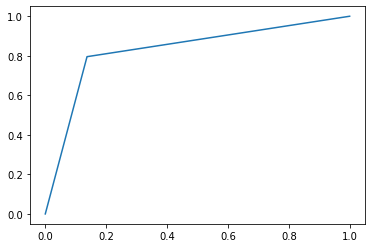

In [115]:
## Confusion Matrix 출력
y_test_vif_pred = pipe_vif.predict(X_test_vif)
print(classification_report(y_test, y_test_vif_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_test_vif_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## 모두 파산 안한다고(0) 예측할 경우

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364

AUC: 0.5


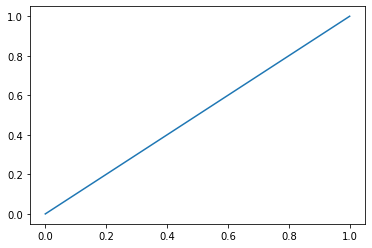

In [116]:
y_deny = pd.DataFrame({'Bankruptcy?':[0]*1364})

## Confusion Matrix 출력
print(classification_report(y_test, y_deny))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_deny, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

변수들을 많이 삭제했음에도 성능을 아주 약간밖에 떨어지지 않음

## Oversampling하지 않고 학습한 모델의 성능

Bankrupt?
0            0.967736
1            0.032264
dtype: float64
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.44      0.16      0.23        44

    accuracy                           0.97      1364
   macro avg       0.71      0.58      0.61      1364
weighted avg       0.96      0.97      0.96      1364

AUC: 0.5761363636363637


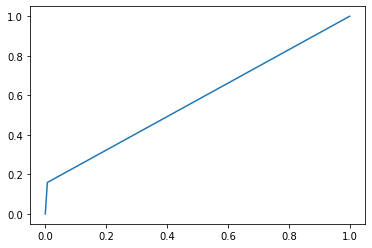

In [117]:
## 원래 데이터에 모델 대입해보기
## 기준모델
base_accuracy_origin = df[target].value_counts(normalize=True)
print(base_accuracy_origin)

### 기본적인 모델
pipe_org = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state=2)
)

# 중요한 Featrues 추출 후 모델 Fit
X_origin = df.drop(labels=target, axis=1)[clean_features]
y_origin = df[target]
pipe_org.fit(X_origin, y_origin)

## Confusion Matrix 출력
y_test_origin_pred = pipe_org.predict(X_test_vif)
print(classification_report(y_test, y_test_origin_pred))

## ROC Curve 활용
fpr, tpr, thresholds = roc_curve(y_test, y_test_origin_pred, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

## PDP & SHAP 활용하여 설명하기

In [97]:
pip install pdpbox

     |████████████████████████████████| 34.0MB 78kB/s 
     |████████████████████████████████| 13.1MB 230kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758227 sha256=21e0141a58b69b43608453a05030ad1aa1150f860c1621b4405b9007f539c7c8
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


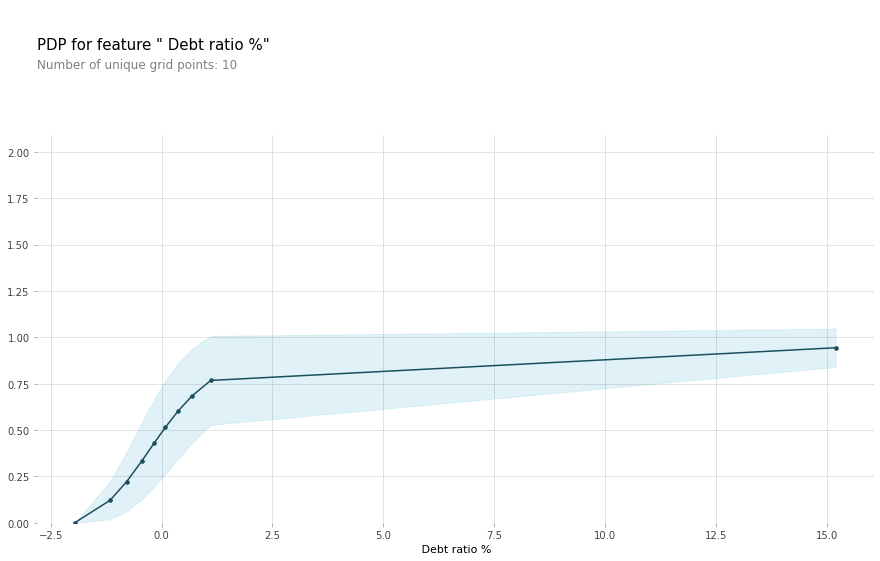

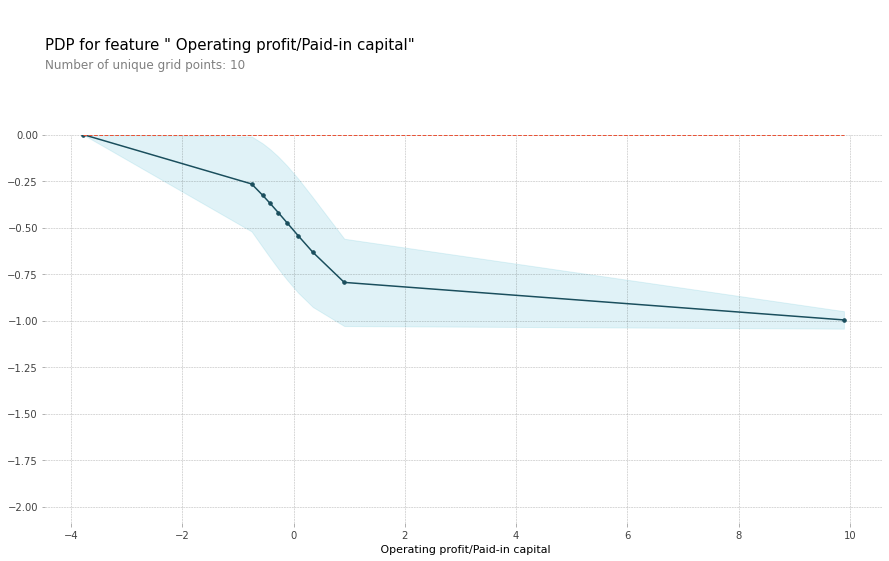

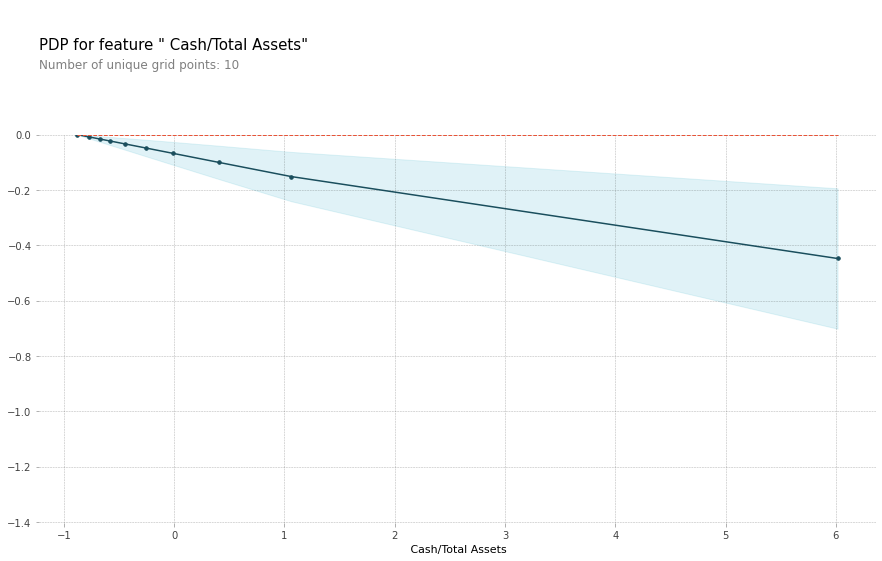

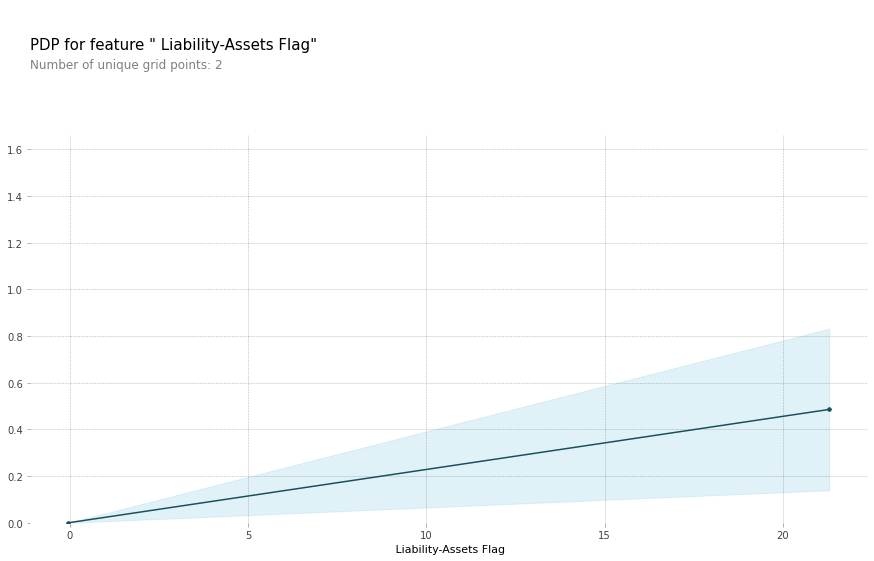

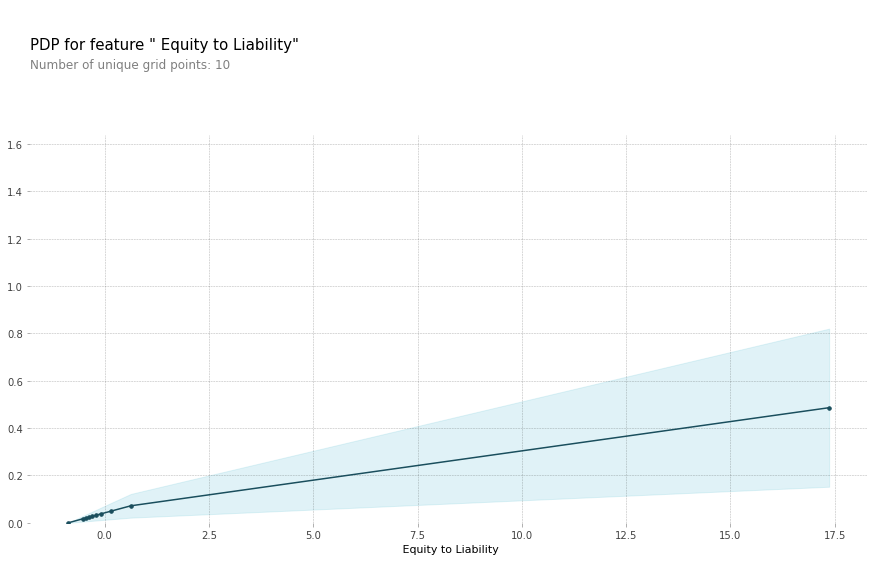

In [118]:
import matplotlib.pyplot as plt
from pdpbox import pdp


preprocessing = pipe_vif.named_steps['preprocessing']
X_preprocessed = preprocessing.fit_transform(X_test_vif)
X_preprocessed = pd.DataFrame(columns=clean_features, data=X_preprocessed)
lr = pipe_vif.named_steps['lr']

for feature in clean_features:
  pdp_dist = pdp.pdp_isolate(model=lr, dataset=X_preprocessed, model_features=clean_features, feature=feature)
  pdp.pdp_plot(pdp_dist, feature)

In [100]:
pip install shap

     |████████████████████████████████| 358kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491627 sha256=f1d6ce2c8443c5a2f4e6052df96a19dc9e1edb3f09cd63079295355712b646a0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


Exact explainer: 1001it [00:17, 55.98it/s]                         


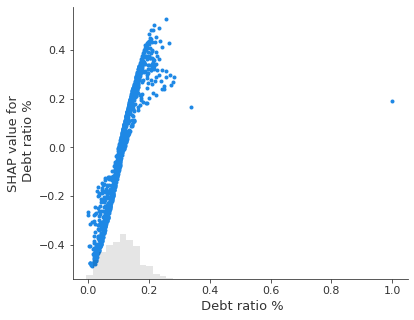

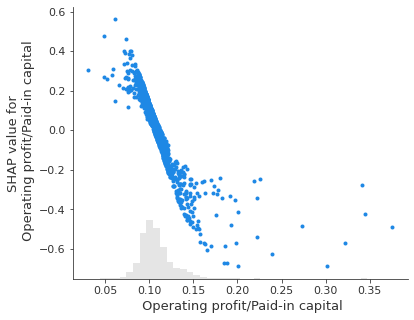

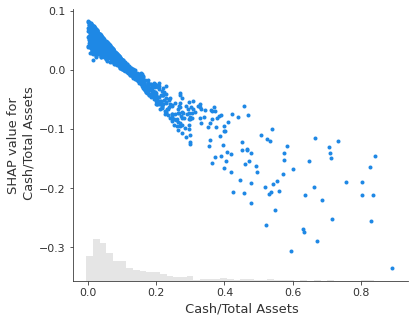

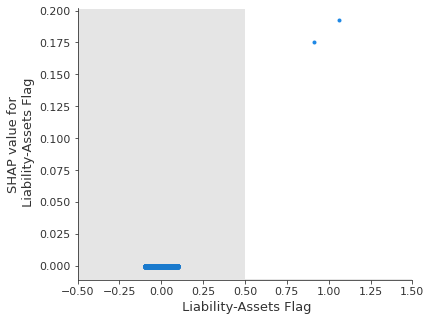

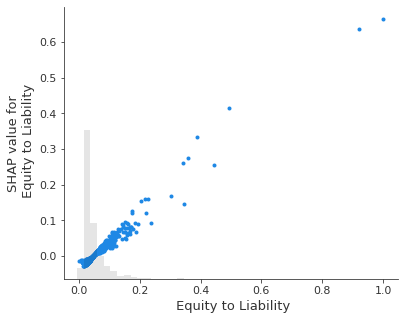

In [119]:
import shap


### SHAP
def pipe_vif_proba(x):
    return pipe_vif.predict_proba(x)[:,1]

background = shap.maskers.Independent(X_test_vif, max_samples=1000)
explainer = shap.Explainer(pipe_vif_proba, background)
shap_values = explainer(X_test_vif[:1000])

for feature in clean_features:
  shap.plots.scatter(shap_values[:, feature])

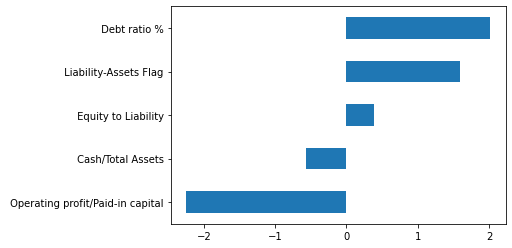

In [120]:
coefficients = pd.Series(lr.coef_[0], X_test_vif.columns)
coefficients.sort_values().plot.barh()

In [121]:
## Permutation Part
warnings.simplefilter(action='ignore', category=FutureWarning)

# permuter 정의
permuter_vif = PermutationImportance(
    pipe_vif.named_steps['lr'], # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_test_transformed = pipe_vif.named_steps['preprocessing'].transform(X_test_vif)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter_vif.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=2,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_iter=5, random_state=2, refit=True, scoring='roc_auc')

In [122]:
feature_names = X_test_vif.columns.tolist()
print("총 변수의 개수 : ", len(feature_names))
pd.Series(permuter_vif.feature_importances_, feature_names).sort_values()

총 변수의 개수 :  5


 Liability-Assets Flag               0.002173
 Equity to Liability                 0.003915
 Cash/Total Assets                   0.007944
 Operating profit/Paid-in capital    0.148240
 Debt ratio %                        0.183547
dtype: float64